In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# In this problem, the initial substrate concentration was given as Cs0 =30 mM

# t is time (hours)
t = np.array([0.113, 0.221, 0.333, 0.450, 0.572, 0.700, 0.835, 0.980, 1.136, 1.308, 1.500, 1.723, 1.992, 2.346, 2.900]) # hrs

# Cs is concentration (mM)
Cs = np.array([28.00, 26.14, 24.29, 22.43, 20.57, 18.71, 16.86, 15.00, 13.14, 11.29, 9.429, 7.571, 5.714, 3.857, 2.000]) # mM



In [2]:
# Evaluating an increment operation to obtain the time and concentration difference
# for dti = ti+1 - ti
dti = np.subtract(t[1:], t[:-1])

# for dCi = C(ti+1) - C(ti)
dCi = np.subtract(Cs[1:], Cs[:-1])

# Average substrate concentration
Csi = np.add(Cs[1:], Cs[:-1])/2

# Average rate of reaction
rsi = -1 * (dCi/dti)



In [3]:
# Dependent variable
# Yi = rsi,
Yi = rsi

# Independent variable
# Xi = rsi/Csi,
Xi = rsi/Csi

# N indicates the number of experimental data points
N = 14

# Removing the last point to make the date fit well

Xi = Xi[:-1]
Yi = Yi[:-1]


In [4]:
# Evaluating regression coefficients b0 and b1 to obtain predicted average rate of reaction (Ypredicted):
# Solving for b0
Numerator_b0 = (sum(Yi) * sum((Xi)**2)) - (sum(Xi*Yi) * sum(Xi))
Denominator_b0 = ((N-1) * sum((Xi)**2)) - (sum(Xi))**2
b0 = Numerator_b0/Denominator_b0

# Solving for b1
Numerator_b1 = ((N-1) * sum(Xi*Yi)) - (sum(Xi) * sum(Yi))
Denominator_b1 = ((N-1) * sum((Xi**2))) - (sum(Xi)**2)
b1 = Numerator_b1/Denominator_b1

# Determining (Ypredicted) from the calculated b0 and b1
Ypredicted = b1*Xi + b0

In [5]:
# Visualizing the experimental data
print("_"*153)
print("Experimental Data from enzymatic hydrolysis of inosine monophosphate to hypoxanthine and ribose phosphate by Inosine nucleosidase enzyme ")
print("_"*153)
df = pd.DataFrame({
    "t (hrs)": t, "Cs (mM)": Cs,
})
print(df)

_________________________________________________________________________________________________________________________________________________________
Experimental Data from enzymatic hydrolysis of inosine monophosphate to hypoxanthine and ribose phosphate by Inosine nucleosidase enzyme 
_________________________________________________________________________________________________________________________________________________________
    t (hrs)  Cs (mM)
0     0.113   28.000
1     0.221   26.140
2     0.333   24.290
3     0.450   22.430
4     0.572   20.570
5     0.700   18.710
6     0.835   16.860
7     0.980   15.000
8     1.136   13.140
9     1.308   11.290
10    1.500    9.429
11    1.723    7.571
12    1.992    5.714
13    2.346    3.857
14    2.900    2.000


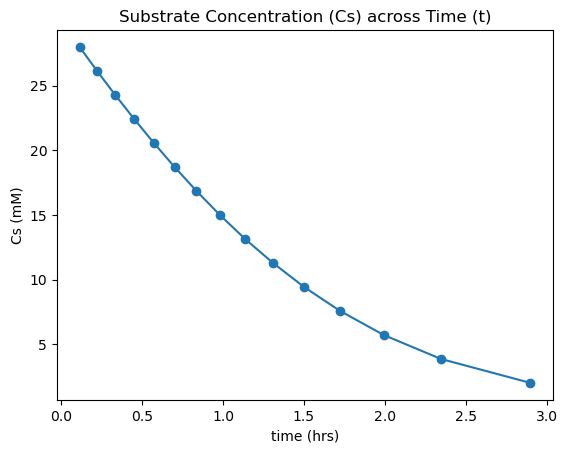

In [6]:
#Visualizing the concentration as function of time
plt.plot(t, Cs, 'o-', label="Concentration vs Time")
plt.title("Substrate Concentration (Cs) across Time (t)")
plt.xlabel("time (hrs)")
plt.ylabel("Cs (mM)")
plt.show()

In [7]:
print("_"*153)
print ("Iteration for time (dti), concentration (dCi), Average (Csi), average rate of reaction (rsi)")
print("_"*153)
df = pd.DataFrame({
    "dti (hrs)": dti, "dCi (mM)": dCi, "Csi (mM)": Csi, "rsi (mM/hrs) ": rsi, 
})
print(df)

_________________________________________________________________________________________________________________________________________________________
Iteration for time (dti), concentration (dCi), Average (Csi), average rate of reaction (rsi)
_________________________________________________________________________________________________________________________________________________________
    dti (hrs)  dCi (mM)  Csi (mM)  rsi (mM/hrs) 
0       0.108    -1.860   27.0700      17.222222
1       0.112    -1.850   25.2150      16.517857
2       0.117    -1.860   23.3600      15.897436
3       0.122    -1.860   21.5000      15.245902
4       0.128    -1.860   19.6400      14.531250
5       0.135    -1.850   17.7850      13.703704
6       0.145    -1.860   15.9300      12.827586
7       0.156    -1.860   14.0700      11.923077
8       0.172    -1.850   12.2150      10.755814
9       0.192    -1.861   10.3595       9.692708
10      0.223    -1.858    8.5000       8.331839
11      0.2

In [8]:
#Visualization of Yi and Ypredicted values for the regression plot
print("_"*153)
print("Experimental (Yi) and predicted (Ypredicted)")
print("_"*153)
df = pd.DataFrame({
    "Xi": Xi,"Yi": Yi,"Yredicted": Ypredicted
})
print(df)

_________________________________________________________________________________________________________________________________________________________
Experimental (Yi) and predicted (Ypredicted)
_________________________________________________________________________________________________________________________________________________________
          Xi         Yi  Yredicted
0   0.636211  17.222222  17.128054
1   0.655081  16.517857  16.646975
2   0.680541  15.897436  15.997879
3   0.709112  15.245902  15.269484
4   0.739880  14.531250  14.485055
5   0.770520  13.703704  13.703907
6   0.805247  12.827586  12.818568
7   0.847411  11.923077  11.743616
8   0.880541  10.755814  10.898981
9   0.935635   9.692708   9.494409
10  0.980216   8.331839   8.357829
11  1.039269   6.903346   6.852309
12  1.096179   5.245763   5.401437


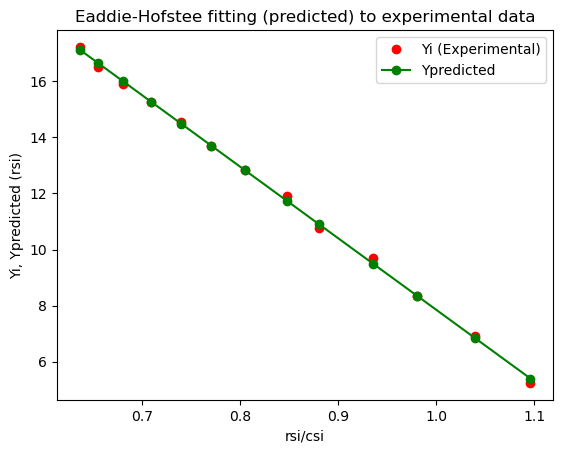

In [9]:
# Visualizing the result of linear regression
plt.plot(Xi, Yi, 'ro', label = "Yi (Experimental)")
plt.plot(Xi, Ypredicted, 'go-', label = "Ypredicted")
plt.title("Eaddie-Hofstee fitting (predicted) to experimental data")
plt.xlabel("rsi/csi")
plt.ylabel("Yi, Ypredicted (rsi)")
plt.legend()
plt.show()

In [10]:
# To assess the fitting of the experimental data, three basic parameters (SSE, R2, and RMSE) have been calculated:
# Mean values of independent (Xm) and dependent (Ym) variables:
Xm = sum(Xi)/(N-1)
Ym = sum(Yi)/(N-1)

# Obtaining Sum of Squares Errors (SSE):
SSE = sum(np.square(Yi - Ypredicted))

# Obtaining determination coefficient (R2):
R2 = 1 - (SSE/sum(np.square(Yi - Ym)))

# Obtaining Root Mean Squared Error (RMSE):
RMSE = np.sqrt(SSE/(N-1-2))

# Obtaining the estimated values of Maximum velocity (Vmax) and Michaelis-Menten constant (Km):
Vmax = b0
Km = -1 * b1


In [11]:
# Printing and Visualization of Determination Coefficients and Kinetic Parameters
print("_"*150)
print ("DETERMINATION COEFFICIENTS")
print("_"*150)

print()
print("Introducing Eadie-Hofstee arrangement of the Michaelis-Menten Equation:")
print("rsi = Vmax - Km * (rsi/Csi)")

print()
print("Regression coefficients (b0 and b1) to generate data for predicted average rate of reaction (Yprediction):")
print("b0 = {:.4f}".format(b0), "mM/hrs")
print("b1 = {:.4f}".format(b1), "mM")

print()
print("Three basic parameters (SSE, R2, and RMSE) have been calculated:")
print("Sum of Squared Errors:")
print("1. SSE = {:.4f}".format(SSE), "(mM/hrs)²")

print()
print("Determination coefficient:")
print("2. R2 = {:.4f}".format(R2))

print()
print("Root Mean Squared Error:")
print("3. RMSE = {:.4f}".format(RMSE), "(mM/hrs)²")

print("_"*150)
print ("ESTIMATED KINETIC PARAMETERS")
print("_"*150)

print("Maximum velocity:")
print("Vmax = {:.4f}".format(Vmax), "mM/hrs")

print()
print("Michaelis-Menten constant:")
print("Km = {:.4f}".format(Km), "mM")


______________________________________________________________________________________________________________________________________________________
DETERMINATION COEFFICIENTS
______________________________________________________________________________________________________________________________________________________

Introducing Eadie-Hofstee arrangement of the Michaelis-Menten Equation:
rsi = Vmax - Km * (rsi/Csi)

Regression coefficients (b0 and b1) to generate data for predicted average rate of reaction (Yprediction):
b0 = 33.3479 mM/hrs
b1 = -25.4944 mM

Three basic parameters (SSE, R2, and RMSE) have been calculated:
Sum of Squared Errors:
1. SSE = 0.1579 (mM/hrs)²

Determination coefficient:
2. R2 = 0.9991

Root Mean Squared Error:
3. RMSE = 0.1198 (mM/hrs)²
______________________________________________________________________________________________________________________________________________________
ESTIMATED KINETIC PARAMETERS
__________________________________